In [1]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline

In [2]:
surrounding_pdf = pd.read_csv('../UseCase_3_Datasets/store_surrounding_pdf_exp.csv')
store_sales = pd.read_csv('../UseCase_3_Datasets/sales_daily_simple_sum.csv')
sales_pdf_daily_sub = store_sales[['store_code','total_sales']]

In [3]:
print("Surrounding Shape",surrounding_pdf.shape)
print("Sales Shape",sales_pdf_daily_sub.shape)

Surrounding Shape (540, 181)
Sales Shape (906, 2)


In [4]:
#Join Store and Surroounding datasets
sales_surrounding_pdf = pd.merge(sales_pdf_daily_sub,surrounding_pdf,on='store_code',how='inner')
sales_surrounding_pdf = sales_surrounding_pdf.drop_duplicates()
# Dropping columns that do not provide useful information for this analysis
for i in sales_surrounding_pdf.columns:
    if sales_surrounding_pdf[i].nunique() == 1:
        sales_surrounding_pdf.drop(i, axis = 1, inplace = True)
print("Sales Surrounding Shape",sales_surrounding_pdf.shape)

Sales Surrounding Shape (540, 177)


In [5]:
# Dropping columns that do not provide useful information for this analysis
for i in sales_surrounding_pdf.columns:
    if sales_surrounding_pdf[i].nunique() == 1:
        sales_surrounding_pdf.drop(i, axis = 1, inplace = True)

In [6]:
# #Visualization of individual attributes
# #Histogram
# sales_surrounding_pdf.hist(sharex=False,sharey=False,xlabelsize=0.25,ylabelsize=0.25,figsize=(20,20))
# pyplot.show()

In [7]:
# sales_surrounding_pdf.plot(kind='density', subplots=True, layout=(10,18), sharex=False, legend=False,fontsize=1,
#                           figsize=(20,20))
# pyplot.show()

In [8]:
# fig = pyplot.figure(figsize=(15,15))
# ax = fig.add_subplot(111)
# cax = ax.matshow(sales_surrounding_pdf.corr(),vmin=-1, vmax=1)
# fig.colorbar(cax)
# pyplot.show()

In [9]:
#Create Train,Test without imputation
#X = sales_surrounding_pdf.loc[:, sales_surrounding_pdf.columns != 'total_sales']
#X = sales_surrounding_pdf.loc[:, sales_surrounding_pdf.columns != 'store_code']
y = sales_surrounding_pdf['total_sales']
X = sales_surrounding_pdf.drop(['total_sales','store_code'],axis=1)
#X = sales_surrounding_pdf.drop('store_code',axis=1)

#Divide into train and test
validation_size = 0.30
seed = 33
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=validation_size,random_state=seed)

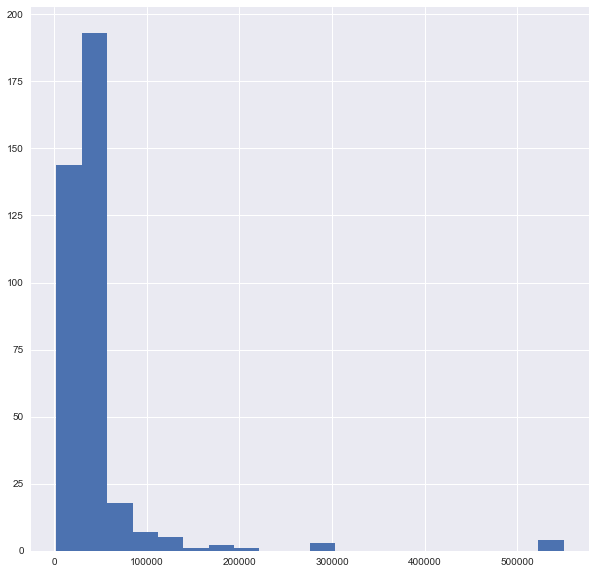

In [10]:
xtick_list = range(0,500000,50000)
ytick_list = range(0,y_train.shape[0],30)
#y_train.plot(kind='hist',subplots=True,fontsize=10,figsize=(10,10),xticks=xtick_list,yticks=ytick_list)
y_train.hist(bins=20,figsize=(10,10),)
# pyplot.xlabel("Store Sales")
# pyplot.show()

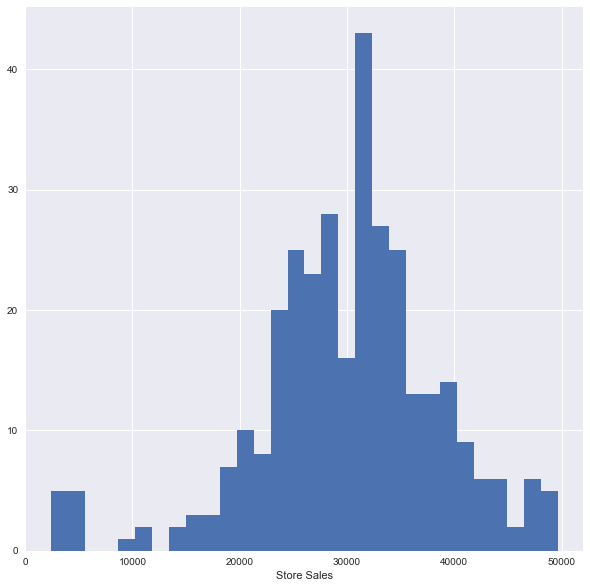

In [11]:
y_train[y_train.values < 50000].hist(bins=30,figsize=(10,10),)
pyplot.xlabel("Store Sales")
pyplot.show()


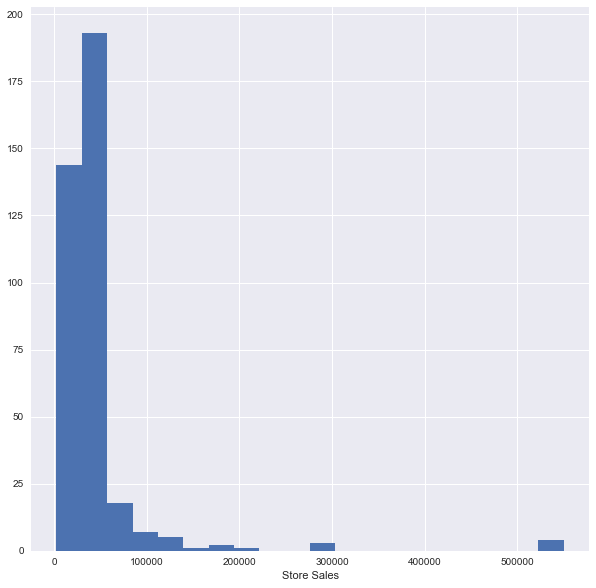

In [12]:
xtick_list = range(0,500000,50000)
ytick_list = range(0,y_test.shape[0],10)
#y_test.plot(kind='hist',subplots=True,fontsize=10,figsize=(10,10),grid=True,xticks=xtick_list,yticks=ytick_list)
y_train.hist(bins=20,figsize=(10,10))
pyplot.xlabel("Store Sales")
pyplot.show()

In [13]:
##Find the most balanced point of the data set :

for i in range (20000,60000,500):
    y_train_sp = y_train.apply(lambda x : 1 if x >=i else 0 )
    y_test_sp = y_test.apply(lambda x : 1 if x >=i else 0)
    print ("Split Point ", i)
    print ("% of 0-class in Test ",y_test_sp.value_counts()[0]/ (y_test_sp.value_counts()[1]+y_test_sp.value_counts()[0])*100)
    print ("% of 0-class in Train ",y_train_sp.value_counts()[0]/ (y_train_sp.value_counts()[1]+y_train_sp.value_counts()[0])*100)
    print("\n")

Split Point  20000
% of 0-class in Test  8.02469135802
% of 0-class in Train  8.46560846561


Split Point  20500
% of 0-class in Test  9.87654320988
% of 0-class in Train  8.73015873016


Split Point  21000
% of 0-class in Test  10.4938271605
% of 0-class in Train  9.78835978836


Split Point  21500
% of 0-class in Test  11.1111111111
% of 0-class in Train  10.3174603175


Split Point  22000
% of 0-class in Test  11.7283950617
% of 0-class in Train  10.8465608466


Split Point  22500
% of 0-class in Test  11.7283950617
% of 0-class in Train  11.9047619048


Split Point  23000
% of 0-class in Test  11.7283950617
% of 0-class in Train  12.1693121693


Split Point  23500
% of 0-class in Test  13.5802469136
% of 0-class in Train  14.2857142857


Split Point  24000
% of 0-class in Test  13.5802469136
% of 0-class in Train  15.6084656085


Split Point  24500
% of 0-class in Test  16.6666666667
% of 0-class in Train  17.7248677249


Split Point  25000
% of 0-class in Test  17.9012345679
% of 

In [14]:
#Based on the above histogram comparison threshold 50,000 is a good enough to make binary classification target
y_train = y_train.apply(lambda x : 1 if x >=33500 else 0 )
y_test = y_test.apply(lambda x : 1 if x >=33500 else 0)

y_test.value_counts()
#Binary Targets created.

1    83
0    79
Name: total_sales, dtype: int64

In [15]:
y_test.value_counts()[0] / (y_test.value_counts()[1]+y_test.value_counts()[0])*100

48.76543209876543

In [16]:
y_train.value_counts()

0    222
1    156
Name: total_sales, dtype: int64

In [17]:
y_train.value_counts()[0] / (y_train.value_counts()[1]+y_train.value_counts()[0])*100

58.730158730158735

In [18]:
#Find Feature Importance via various methods
#1)Logistic Regression
#1.1) Logistic Regression with L1 Penalty (Lasso)
#2)Decision Tree

# Spot-Check Algorithms
models = []
num_folds = 10
seed = 42
scoring = 'roc_auc'

models.append(('LR', LogisticRegression()))
models.append(('LR with L1 penalty', LogisticRegression(penalty='l1')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
import warnings
warnings.filterwarnings('ignore')
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.562421 (0.083360)
LR with L1 penalty: 0.574444 (0.085860)
CART: 0.531854 (0.095253)
LDA: 0.541025 (0.087526)
KNN: 0.562402 (0.074820)
NB: 0.554273 (0.121815)
SVM: 0.597357 (0.087631)


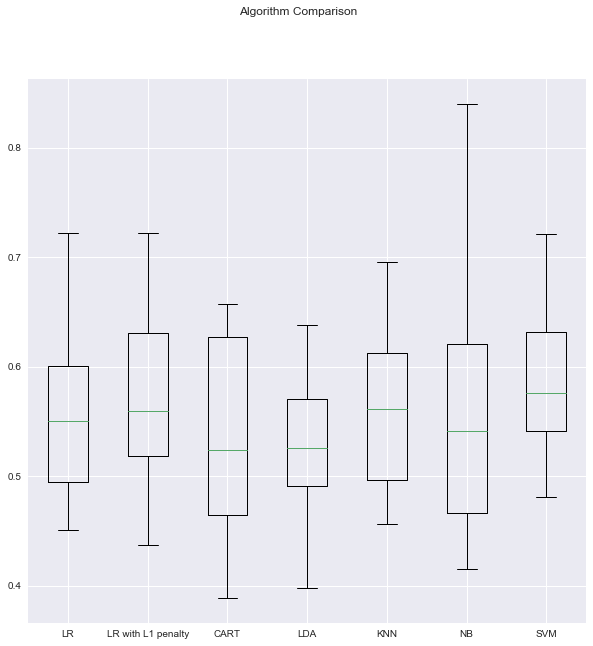

In [19]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [20]:
pipelines = []
pipelines.append(('Scaled LR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('Scaled LR with L1', Pipeline([('Scaler', StandardScaler()),('LR with L1',LogisticRegression(penalty='l1'))])))
pipelines.append(('Scaled CART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier(max_depth=5))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled LR: 0.557674 (0.065016)
Scaled LR with L1: 0.559029 (0.074718)
Scaled CART: 0.562771 (0.072748)
ScaledKNN: 0.544272 (0.044799)
ScaledNB: 0.552369 (0.121206)
ScaledSVM: 0.605510 (0.077783)


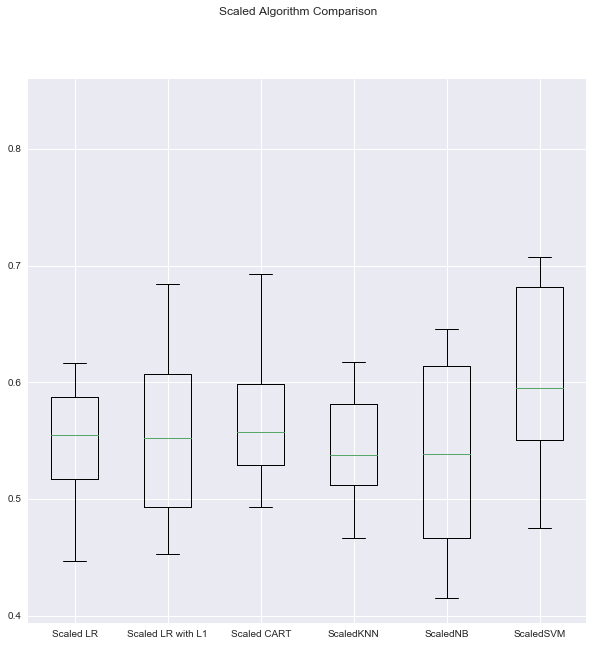

In [21]:
fig = pyplot.figure(figsize=(10,10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [22]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.541536 (0.055447)
GBM: 0.603680 (0.060702)
RF: 0.553609 (0.122390)
ET: 0.522872 (0.102673)


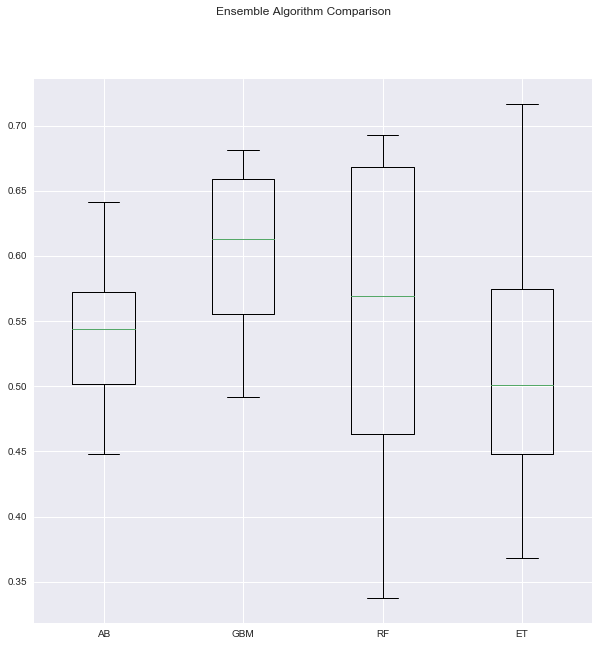

In [23]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,10))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
#     plt.xticks.set_color('black')
#     plt.yticks.set_color('black')
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #ax.xaxis.label.set_color('red')
    #plt.xlabel.set_color('black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
# prepare the model
scaler = StandardScaler().fit(X_train)
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)

# print(accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

Confusion matrix, without normalization
[[78  1]
 [82  1]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.99  0.01]]


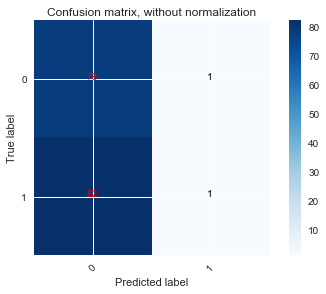

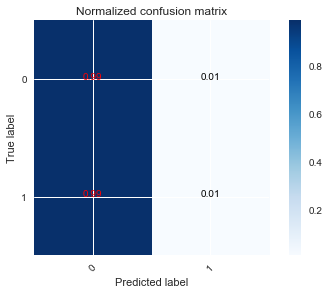

In [26]:
import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
class_names = ['0','1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')
plt.show()

In [27]:
def visualize_tree(tree,feature_names,file_name):
    """Create tree png using graphviz.
    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open(file_name, 'w') as f:
        export_graphviz(tree, out_file=f,feature_names=feature_names)
    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to produce visualization")
visualize_tree(model, X_train.columns,"dt_gini.txt")

In [28]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = DecisionTreeClassifier(max_depth=3,criterion='entropy')
model.fit(rescaledX, y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)

print(roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
visualize_tree(model, X_train.columns,"dt_entropy.txt")

0.521961262773
[[72  7]
 [72 11]]
             precision    recall  f1-score   support

          0       0.50      0.91      0.65        79
          1       0.61      0.13      0.22        83

avg / total       0.56      0.51      0.43       162



In [29]:
#Find Feature Importance with Random Forest Classifer and Extra Tress Classifier

In [30]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

# n_estimator = list(range(10,500,10))
# print(n_estimator)
param_grid = { 
    'n_estimators': list(range(10,500,10)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(3,9,1))
}

CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid, cv= 5,scoring='roc_auc')
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 60}


In [31]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(n_estimators=1000,max_depth=10)
model.fit(rescaledX, y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)

print(roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.550861674546
[[68 11]
 [63 20]]
             precision    recall  f1-score   support

          0       0.52      0.86      0.65        79
          1       0.65      0.24      0.35        83

avg / total       0.58      0.54      0.50       162



Feature ranking:
1. feature avr_doctor (0.027753)
2. feature avr_store (0.026610)
3. feature avr_restaurant (0.022909)
4. feature avr_lodging (0.019758)
5. feature n_doctor (0.018078)
6. feature n_store (0.017996)
7. feature avr_transit_station (0.016330)
8. feature no_of_near_by_shops (0.016190)
9. feature avr_atm (0.015191)
10. feature avr_bus_station (0.014503)


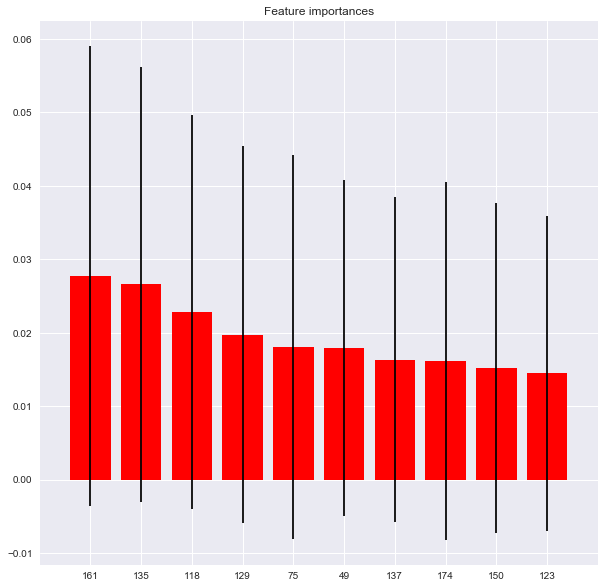

In [32]:
# Build a forest and compute the feature importances
def visualizeFeatureImportance(model,feature_names,no_of_features):
    forest = model
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    features = no_of_features
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(features):
        print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
    # Plot the feature importances of the forest
    plt.figure(figsize=(10,10))
    plt.title("Feature importances")
    plt.bar(range(features), importances[indices[:features]],color="r", yerr=std[indices[:features]], align="center")
    plt.xticks(range(features), indices[:features])
    plt.xlim([-1,features])
    plt.show()

visualizeFeatureImportance(model,X_train.columns,10)

0.550861674546
[[68 11]
 [63 20]]
             precision    recall  f1-score   support

          0       0.52      0.86      0.65        79
          1       0.65      0.24      0.35        83

avg / total       0.58      0.54      0.50       162

Feature ranking:
1. feature avr_lodging (0.017793)
2. feature avr_doctor (0.014627)
3. feature avr_store (0.014332)
4. feature no_of_near_by_shops (0.013033)
5. feature avr_atm (0.012229)
6. feature avr_restaurant (0.012090)
7. feature avr_shoe_store (0.011812)
8. feature near_by_post_code (0.011494)
9. feature n_car_dealer (0.011158)
10. feature n_doctor (0.011041)


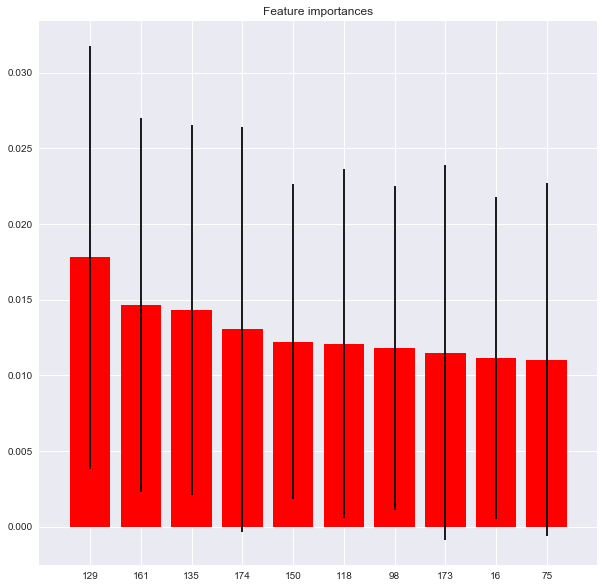

In [33]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_et = ExtraTreesClassifier(n_estimators=200, max_depth=20)
model_et.fit(rescaledX, y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)

print(roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
visualizeFeatureImportance(model_et,X_train.columns,10)

In [34]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = LogisticRegression(C=0.001,penalty='l1',n_jobs=10,class_weight='balanced') 


param_grid = { 
    'C': [0.0001,0.00015,0.0015,0.002,0.003,0.004,0.005]
}

CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid, cv= 5,scoring='roc_auc')
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

{'C': 0.003}


Confusion matrix, without normalization
[[37 42]
 [34 49]]
0.529357938081


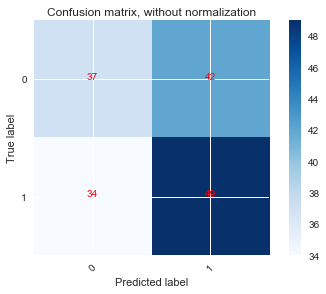

In [35]:
lr = LogisticRegression(C=0.003,penalty='l1',n_jobs=10)
lr.fit(X_train, y_train)
predictions = model.predict(X_test)

import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
class_names = ['0','1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix, without normalization')

print(roc_auc_score(y_test, predictions))
# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')
# plt.show()

In [36]:
from tpot import TPOTClassifier

# prepare the model
model = TPOTClassifier(generations=5, population_size=50, verbosity=2,cv=10,scoring='roc_auc')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))


Version 0.9.0 of tpot is outdated. Version 0.9.1 was released Friday November 10, 2017.


Optimization Progress:  33%|███▎      | 100/300 [03:09<08:13,  2.47s/pipeline] 

Generation 1 - Current best internal CV score: 0.6128120882740448


Optimization Progress:  50%|█████     | 150/300 [05:36<07:53,  3.16s/pipeline]

Generation 2 - Current best internal CV score: 0.6133168642951252


Optimization Progress:  67%|██████▋   | 200/300 [09:01<06:55,  4.15s/pipeline]

Generation 3 - Current best internal CV score: 0.6196360342555994


Optimization Progress:  84%|████████▎ | 251/300 [19:38<03:04,  3.76s/pipeline]   

Generation 4 - Current best internal CV score: 0.6217448945981555


Generation 5 - Current best internal CV score: 0.6217448945981555

Best pipeline: ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=6, max_features=0.35, min_samples_leaf=2, min_samples_split=17, n_estimators=100, subsample=0.4), bootstrap=False, criterion=gini, max_features=1.0, min_samples_leaf=12, min_samples_split=8, n_estimators=100)
0.539042244929
[[49 30]
 [45 38]]
